In [ ]:
pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=e4070e836dc7f1ff3eb70ce4e612eeddaad77adc25f12de9b215bbf72220261b
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


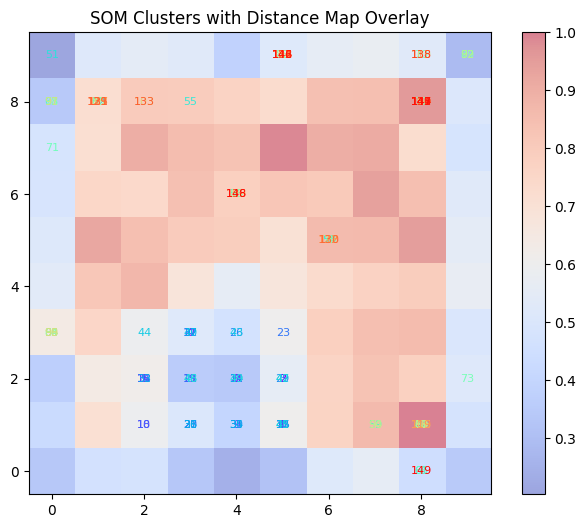

In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data  # Features (sepal length, sepal width, petal length, petal width)

# Standardize the data (SOM performs better with standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the SOM
# Here we create a 10x10 grid of neurons with 4 input features (since the iris dataset has 4 features)
som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5)

# Train the SOM with the data
som.train(X_scaled, num_iteration=100)

# Visualize the results

# Visualize the clusters with color-coding for clarity
plt.figure(figsize=(8, 6))
for i, x in enumerate(X_scaled):
    win_position = som.winner(x)
    plt.text(win_position[0], win_position[1], str(i),
             color=plt.cm.rainbow(i / len(X_scaled)),
             fontsize=8, ha='center', va='center')

# Optionally, color the grid based on distance map
plt.imshow(som.distance_map().T, cmap='coolwarm', origin='lower', alpha=0.5)  # Semi-transparent
plt.colorbar()
plt.title('SOM Clusters with Distance Map Overlay')
plt.show()


# Optionally, you can also use k-means or other clustering techniques to identify cluster centroids


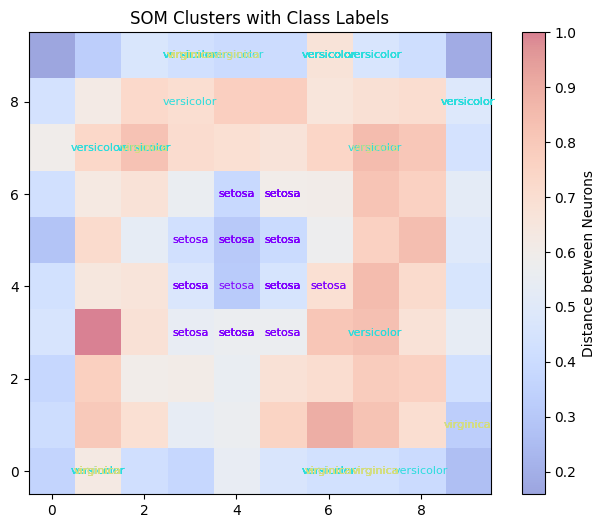

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from minisom import MiniSom

# Load the Iris dataset
data = load_iris()
X = data.data  # Features (sepal length, sepal width, petal length, petal width)
y = data.target  # Labels (class labels: 0, 1, 2)
target_names = data.target_names  # Class names: 'setosa', 'versicolor', 'virginica'

# Standardize the data (SOM performs better with standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5)
som.train(X_scaled, num_iteration=100)

# Plotting the results with meaningful labels
plt.figure(figsize=(8, 6))

# Iterate over all data points
for i, x in enumerate(X_scaled):
    win_position = som.winner(x)  # Find the winning neuron
    class_name = target_names[y[i]]  # Get the class name corresponding to the label
    plt.text(win_position[0], win_position[1], class_name,
             color=plt.cm.rainbow(y[i] / 3),  # Color by class label (y[i])
             fontsize=8, ha='center', va='center')

# Overlay the distance map to see the relationships between neurons
plt.imshow(som.distance_map().T, cmap='coolwarm', origin='lower', alpha=0.5)  # Semi-transparent overlay
plt.colorbar(label='Distance between Neurons')

# Adding title and showing the plot
plt.title('SOM Clusters with Class Labels')
plt.show()
